In [1]:
import sys
sys.path.append("/Users/lucas/repositories/degen_discovery/package_invSigma/")

import jax
import jax.numpy as jnp

a = 3.5  # average morning wait time
b = -1  # average difference afternoon wait time
sigma_a = 1  # std dev in intercepts
sigma_b = 0.5  # std dev in slopes
rho = -0.1  # correlation between intercepts and slopes

sigmas = jnp.array([sigma_a, sigma_b])  # standard deviations
Rho = jnp.array([[1, rho], [rho, 1]])  # correlation matrix

# now matrix multiply to get covariance matrix
Sigma = jnp.diag(sigmas) @ Rho @ jnp.diag(sigmas)


Sigma = jnp.eye(2)

In [2]:
def mu_x_from_y(y):
  x0 = y[0]
  x1 = y[1] - x0**2

  return jnp.array([x0, x1])

def mu_y_from_x(x):
  return jnp.array([x[0], x[1] + x[0]**2])

In [3]:
# vanilla rosenbrock
def rosen(x,y,a=1.,b=100.):
    return (a - x)**2. + b*(y - x**2)**2

In [45]:
rosen(X, Y).shape

(100, 100)

In [48]:
X.shape, Y.shape

((100, 100), (100, 100))

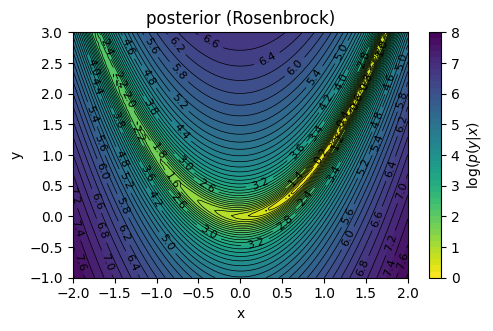

In [35]:
# toy version of Rosenbrock
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(X, Y)

Z = np.log(Z + 1.0)

# Create the filled contour plot
plt.figure(figsize=(1.5*3.41, 3.41))
contour = plt.contourf(X, Y, Z, levels=40, cmap='viridis_r')  # levels can be int or list
plt.colorbar(contour, label=r'$\log(p(y | x)$')  # Add a color bar

# Optional: add contour lines on top
lines = plt.contour(X, Y, Z, levels=40, colors='black', linewidths=0.5)
plt.clabel(lines, inline=True, fontsize=8)

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('posterior (Rosenbrock)')

# Show plot
plt.tight_layout()
plt.show()


# compare to posterior from multivariate normal setup


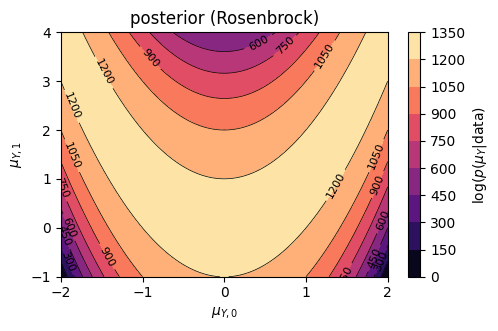

In [361]:
import numpy as np
import matplotlib.pyplot as plt

sigmas = np.array([1.0, 1.0/10])

sigmas = np.array([25., 1.0])

n_d = 100


def post(ν0, ν1, μ=0.0, sigmas=sigmas, n_d=n_d):
    sigmas = (sigmas / jnp.sqrt(n_d))**2
    return - 0.5 * (((ν0 - μ)**2 / sigmas[0]) + ((ν1 - ν0**2 - μ)**2 / sigmas[1]))


# Sample data
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x, y)
Z = (post)(X, Y) 
Z -= Z.min()

#Z = np.log(Z)

# Create the filled contour plot
plt.figure(figsize=(1.5*3.41, 3.41))
contour = plt.contourf(X, Y, Z, levels=10, cmap='magma')  # levels can be int or list
plt.colorbar(contour, label=r'$\log(p(\mu_Y | \rm data)$')  # Add a color bar

# Optional: add contour lines on top
lines = plt.contour(X, Y, Z, levels=10, colors='black', linewidths=0.5)
plt.clabel(lines, inline=True, fontsize=8)

# Labels and title
plt.xlabel(r'$\mu_{Y,0}$')
plt.ylabel(r'$\mu_{Y,1}$')
plt.title('posterior (Rosenbrock)')

# Show plot
plt.tight_layout()
plt.show()


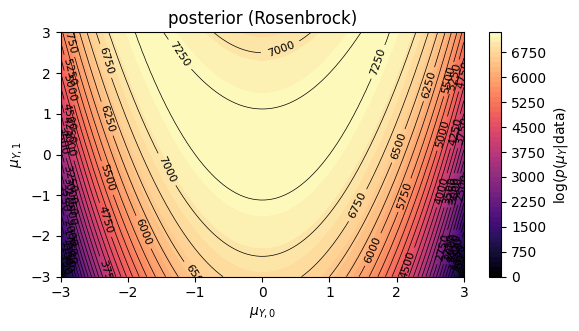

In [369]:
import numpy as np
import matplotlib.pyplot as plt

sigmas = np.array([1.0, 1.0/10])

sigmas = np.array([2.0, 1.0])

n_d = 100


def post(ν0, ν1, 
         μ0=0.0,
         μ1=0.0,
         sigmas=sigmas, n_d=n_d):
    sigmas = (sigmas / jnp.sqrt(n_d))**2
    return - 0.5 * (((ν0 - μ0)**2 / sigmas[0]) + ((ν1 - ν0**2 - μ1)**2 / sigmas[1]))


# Sample data
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = (post)(X, Y) 
Z -= Z.min()

#Z = np.log(Z + 1.0)

# Create the filled contour plot
plt.figure(figsize=(1.75*3.41, 3.41))
contour = plt.contourf(X, Y, Z, levels=60, cmap='magma')  # levels can be int or list
plt.colorbar(contour, label=r'$\log(p(\mu_Y | \rm data)$')  # Add a color bar

# Optional: add contour lines on top
lines = plt.contour(X, Y, Z, levels=30, colors='black', linewidths=0.5)
plt.clabel(lines, inline=True, fontsize=8)

# Labels and title
plt.xlabel(r'$\mu_{Y,0}$')
plt.ylabel(r'$\mu_{Y,1}$')
plt.title('posterior (Rosenbrock)')

# Show plot
plt.tight_layout()
plt.show()


In [328]:
Z

Array([[   0.      ,  117.993164,  229.70068 , ...,  229.70068 ,
         117.993164,    0.      ],
       [  12.10083 ,  129.68994 ,  241.00171 , ...,  241.00171 ,
         129.68994 ,   12.10083 ],
       [  24.160767,  141.34595 ,  252.26196 , ...,  252.26196 ,
         141.34595 ,   24.160767],
       ...,
       [ 983.7568  , 1062.562   , 1135.8813  , ..., 1135.8813  ,
        1062.562   ,  983.7568  ],
       [ 991.8988  , 1070.3     , 1143.2236  , ..., 1143.2236  ,
        1070.3     ,  991.8988  ],
       [1000.      , 1077.9973  , 1150.5251  , ..., 1150.5251  ,
        1077.9973  , 1000.      ]], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


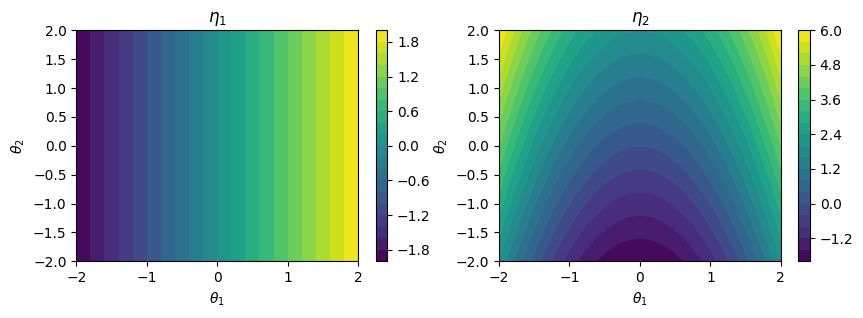

In [25]:
num = 30

MIN_MU = -2
MAX_MU = 2

xs = jnp.linspace(MIN_MU, MAX_MU, num) # MEAN
ys = jnp.linspace(MIN_MU, MAX_MU, num) # VARIANCE
xs,ys = jnp.meshgrid(xs, ys)

X = jnp.stack([xs.flatten(), (ys.flatten())], axis=-1)
etas = jax.vmap(mu_y_from_x)(X) #model.apply(w, X)


# MAKE NICE PICTURE
plt.figure(figsize=(10, 3))

plt.subplot(121)

data = etas[:, 0].reshape(xs.shape)

im = plt.contourf(xs, ys, (data), cmap='viridis', levels=20)
plt.colorbar(im)
#plt.yscale('log')
plt.ylabel(r'$\theta_2$')
plt.xlabel(r'$\theta_1$')
plt.title(r'$ \eta_1$')
plt.legend(framealpha=0., loc='lower left')

plt.subplot(122)
data = etas[:, 1].reshape(xs.shape)

im = plt.contourf(xs, ys, (data), cmap='viridis', levels=20)
plt.colorbar(im)
#plt.yscale('log')
plt.ylabel(r'$\theta_2$')
plt.xlabel(r'$\theta_1$')
plt.title(r'$\eta_2$')
plt.legend(framealpha=0., loc='lower left')